# LIBRARIES



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry# CLEANING 


#### Import ```attacks.csv```

In [2]:
pd.set_option ("display.max_columns", None)
df = pd.read_csv("data/attacks.csv", encoding="latin1")
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# CLEANING 


In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

#### 01.Remove the ```columns``` i don't need

In [4]:
df.drop(columns=["Investigator or Source", 
                 "pdf", 
                 "href formula", 
                 "href", 
                 "Case Number.1", 
                 "Case Number.2", 
                 "original order", 
                 "Unnamed: 22",
                 "Unnamed: 23",
                 "Name",
                 "Location",
                 "Case Number",
                 "Area",
                 "Age",
                 "Sex ",
                 "Time",
                 "Fatal (Y/N)",
                 "Type",
                 "Activity",
                 "Injury"], 
        axis=1, inplace=True)
df

,Date,Year,Country,Species
0,25-Jun-2018,2018.0,USA,White shark
1,18-Jun-2018,2018.0,USA,NaN
2,09-Jun-2018,2018.0,USA,NaN
3,08-Jun-2018,2018.0,AUSTRALIA,2 m shark
4,04-Jun-2018,2018.0,MEXICO,"Tiger shark, 3m"
...,...,...,...,...
25718,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN


#### 02. Remove the ```rows``` i don't need

In [5]:
df.dropna(axis = 0, how = 'all', inplace = True)
df

,Date,Year,Country,Species
0,25-Jun-2018,2018.0,USA,White shark
1,18-Jun-2018,2018.0,USA,NaN
2,09-Jun-2018,2018.0,USA,NaN
3,08-Jun-2018,2018.0,AUSTRALIA,2 m shark
4,04-Jun-2018,2018.0,MEXICO,"Tiger shark, 3m"
...,...,...,...,...
6297,Before 1903,0.0,AUSTRALIA,NaN
6298,Before 1903,0.0,AUSTRALIA,NaN
6299,1900-1905,0.0,USA,NaN
6300,1883-1889,0.0,PANAMA,NaN


# TRANSFORMING


## Hipothesis 1: Are sharks more aggressive according to the continent?
## Hipothesis 2: Are sharks more aggressive according to the season of the year?
## Hipothesis 3: Which sharks attack the most by continent and by season?
    Seasons: 
        To get the seasons i need first to sort the countries in the "Country" column by hemisphere.
        - Winter: Dec(12), Jan(1), Feb(2)
        - Spring: Mar(3), Apr(4), May(5)
        - Summer: Jun(6), Jul(7), Aug(8)
        - Autumn: Sep(9), Oct(10), Nov(11)
    Type Sharks:
        - White Shark: WHITE
        - Bull Shark: BULL
        - Mako Shark: MAKO
        - Tiger Shark: TIGER
        - Blacktip Shark: BLACKTIP

### CONTINENTS

#### 01. Change the name of the countries in the column "Country" to capitalize the first word of each word.
        In this way, pycountry will detect the countries properly.

In [6]:
# First we remove the NaN values from the Country column, otherwise will get an error trying to capitalize floats.
df.dropna(subset=['Country'], inplace=True) 

# split(): the original string is split into words
# capitalize(): capitalizes the first letter of each word
# join(): the words are joined using the join() method.
df['Country'] = df['Country'].apply(lambda x: ' '.join([word.capitalize() for word in x.split()]))
df


,Date,Year,Country,Species
0,25-Jun-2018,2018.0,Usa,White shark
1,18-Jun-2018,2018.0,Usa,NaN
2,09-Jun-2018,2018.0,Usa,NaN
3,08-Jun-2018,2018.0,Australia,2 m shark
4,04-Jun-2018,2018.0,Mexico,"Tiger shark, 3m"
...,...,...,...,...
6297,Before 1903,0.0,Australia,NaN
6298,Before 1903,0.0,Australia,NaN
6299,1900-1905,0.0,Usa,NaN
6300,1883-1889,0.0,Panama,NaN


#### 02. Now we want to create a ```for loop``` to check if the elements of the ```column "Country"``` are detected by ```pycountry```.

In [7]:
valid_countries = []
for country in df['Country']:
    if pycountry.countries.get(name=country) is not None:
        valid_countries.append(country)

#### 03. Now we want the ```column "Country"``` to have only the values of the list ```valid_countries```.

In [8]:
df = df[df['Country'].isin(valid_countries)] #  using isin you can filter the rows according to whether the values belong to the valid_countries list or not.
df = df.reset_index()

In [9]:
country_to_continent = {
    'Australia': 'Oceania',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'South Africa': 'Africa',
    'Thailand': 'Asia',
    'Costa Rica': 'North America',
    'Maldives': 'Asia',
    'Bahamas': 'North America',
    'New Caledonia': 'Oceania',
    'Ecuador': 'South America',
    'Malaysia': 'Asia',
    'Cuba': 'North America',
    'Mauritius': 'Africa',
    'New Zealand': 'Oceania',
    'Spain': 'Europe',
    'Samoa': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Japan': 'Asia',
    'Egypt': 'Africa',
    'Comoros': 'Africa',
    'French Polynesia': 'Oceania',
    'United Kingdom': 'Europe',
    'United Arab Emirates': 'Asia',
    'Philippines': 'Asia',
    'Indonesia': 'Asia',
    'China': 'Asia',
    'Fiji': 'Oceania',
    'Dominican Republic': 'North America',
    'Cayman Islands': 'North America',
    'Aruba': 'North America',
    'Mozambique': 'Africa',
    'Puerto Rico': 'North America',
    'Italy': 'Europe',
    'Greece': 'Europe',
    'France': 'Europe',
    'Papua New Guinea': 'Oceania',
    'Kiribati': 'Oceania',
    'Israel': 'Asia',
    'Jamaica': 'North America',
    'Guam': 'Oceania',
    'Seychelles': 'Africa',
    'Belize': 'North America',
    'Nigeria': 'Africa',
    'Tonga': 'Oceania',
    'Canada': 'North America',
    'Croatia': 'Europe',
    'Saudi Arabia': 'Asia',
    'Chile': 'South America',
    'Kenya': 'Africa',
    'Malta': 'Europe',
    'Madagascar': 'Africa',
    'Panama': 'North America',
    'Somalia': 'Africa',
    'Norway': 'Europe',
    'Senegal': 'Africa',
    'Yemen': 'Asia',
    'Sierra Leone': 'Africa',
    'Liberia': 'Africa',
    'Vanuatu': 'Oceania',
    'Honduras': 'North America',
    'Sri Lanka': 'Asia',
    'Uruguay': 'South America',
    'India': 'Asia',
    'Marshall Islands': 'Oceania',
    'Hong Kong': 'Asia',
    'El Salvador': 'North America',
    'Angola': 'Africa',
    'Bermuda': 'North America',
    'Montenegro': 'Europe',
    'Tunisia': 'Africa',
    'Namibia': 'Africa',
    'Portugal': 'Europe',
    'Palau': 'Oceania',
    'Grenada': 'North America',
    'Turkey': 'Asia',
    'Singapore': 'Asia',
    'Sudan': 'Africa',
    'American Samoa': 'Oceania',
    'Argentina': 'South America',
    'Guatemala': 'North America',
    'Nicaragua': 'North America',
    'Iraq': 'Asia',
    'Iceland': 'Europe',
    'Barbados': 'North America',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Ireland': 'Europe',
    'Lebanon': 'Asia',
    'Paraguay': 'South America',
    'Georgia': 'Asia',
    'Guinea': 'Africa',
    'Cook Islands': 'Oceania',
    'Martinique': 'North America',
}

# create a new dictionary that maps each continent to a list of countries in that continent
continent_to_countries = {}

for country, continent in country_to_continent.items():
    if continent not in continent_to_countries:
        continent_to_countries[continent] = []
    continent_to_countries[continent].append(country)
    
#print(continent_to_countries)

In [10]:
df['Continent'] = df['Country'].map(country_to_continent).fillna('Unknown')
df

,index,Date,Year,Country,Species,Continent
0,3,08-Jun-2018,2018.0,Australia,2 m shark,Oceania
1,4,04-Jun-2018,2018.0,Mexico,"Tiger shark, 3m",North America
2,5,03-Jun-2018,2018.0,Australia,NaN,Oceania
3,6,03-Jun-2018,2018.0,Brazil,Tiger shark,South America
4,10,24-May-2018,2018.0,Australia,Grey reef shark,Oceania
...,...,...,...,...,...,...
3630,6295,Before 1906,0.0,Australia,Blue pointers,Oceania
3631,6296,Before 1906,0.0,Australia,Said to involve a grey nurse shark that leapt ...,Oceania
3632,6297,Before 1903,0.0,Australia,NaN,Oceania
3633,6298,Before 1903,0.0,Australia,NaN,Oceania


### MONTHS / SEASONS

#### 01. I need to create a ```column``` with the ```months``` of the year based on the column "Date"

In [22]:
# Convert the 'Date' column to datetime format.
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 

# Create a column 'Month' with the values of the months
df['Month'] = df['Date'].dt.month 

df

,index,Date,Year,Country,Species,Continent,Month,Seasons,Species
0,3,2018-06-08,2018.0,Australia,2 m shark,Oceania,6,Summer,2 m shark
1,4,2018-06-04,2018.0,Mexico,"Tiger shark, 3m",North America,6,Summer,"Tiger shark, 3m"
2,5,2018-06-03,2018.0,Australia,NaN,Oceania,6,Summer,NaN
3,6,2018-06-03,2018.0,Brazil,Tiger shark,South America,6,Summer,Tiger shark
4,10,2018-05-24,2018.0,Australia,Grey reef shark,Oceania,5,Spring,Grey reef shark
...,...,...,...,...,...,...,...,...,...
3518,6124,1807-01-12,1807.0,Australia,NaN,Oceania,1,Winter,NaN
3524,6136,1788-05-10,1788.0,Australia,NaN,Oceania,5,Spring,NaN
3526,6140,1784-12-12,1784.0,Jamaica,NaN,North America,12,Winter,NaN
3527,6141,1783-03-02,1783.0,Martinique,NaN,North America,3,Spring,NaN


#### 03. I need to create a ```column``` with the ```seasons``` of the year grouping the months in the column "Month"

In [28]:
def get_seasons(continent, month):
    
    if continent == 'North America':
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
        
    elif continent == 'South America':
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:
            return 'Spring'
        
    elif continent == 'Europe':
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
        
    elif continent == 'Africa':
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:
            return 'Spring'
        
    elif continent == 'Asia':
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
        
    elif continent == 'Oceania':
        if month in [12, 1, 2]:
            return 'Summer'
        elif month in [3, 4, 5]:
            return 'Autumn'
        elif month in [6, 7, 8]:
            return 'Winter'
        else:
            return 'Spring'


In [29]:
df['Season'] = df.apply(lambda x: get_seasons(x['Continent'], x['Month']), axis=1)
df

,index,Date,Year,Country,Species,Continent,Month,Seasons,Species,Season
0,3,2018-06-08,2018.0,Australia,2 m shark,Oceania,6,Summer,2 m shark,Winter
1,4,2018-06-04,2018.0,Mexico,"Tiger shark, 3m",North America,6,Summer,"Tiger shark, 3m",Summer
2,5,2018-06-03,2018.0,Australia,NaN,Oceania,6,Summer,NaN,Winter
3,6,2018-06-03,2018.0,Brazil,Tiger shark,South America,6,Summer,Tiger shark,Winter
4,10,2018-05-24,2018.0,Australia,Grey reef shark,Oceania,5,Spring,Grey reef shark,Autumn
...,...,...,...,...,...,...,...,...,...,...
3518,6124,1807-01-12,1807.0,Australia,NaN,Oceania,1,Winter,NaN,Summer
3524,6136,1788-05-10,1788.0,Australia,NaN,Oceania,5,Spring,NaN,Autumn
3526,6140,1784-12-12,1784.0,Jamaica,NaN,North America,12,Winter,NaN,Winter
3527,6141,1783-03-02,1783.0,Martinique,NaN,North America,3,Spring,NaN,Spring


### SPECIES

#### 01. I need to ```remove null values``` from "Month"column

In [13]:
list(df['Species '].unique())

['2 m shark',
 'Tiger shark, 3m',
 nan,
 'Tiger shark',
 'Grey reef shark',
 'Shark involvement not confirmed',
 'Questionable',
 '3 m shark',
 'White shark, 3.5 m',
 'White shark, 2.5 m',
 'Juvenile bull shark',
 'Bull shark',
 'White shark',
 'Wobbegong shark',
 '3.5 m shark',
 '1.8 m shark',
 'Blacktip shark',
 'Juvenile white shark,  2.7 to 3.2 m',
 'Bull shark, 2 m',
 'Possibly a wobbegong',
 'Injury believed caused by an eel, not a shark',
 'Galapagos shark?',
 '2m shark',
 'Bull shark, 3 m ',
 'Grey reef shark. 2 m',
 'small shark',
 'Wobbegong shark?',
 'Juvenile nurse shark',
 "Nurse shark. 5'",
 'White shark, 3 m',
 'Shark involvement questionable',
 "5' shark",
 'Oceanic whitetip shark, 1.8 to 2 m',
 "Blue shark 6'",
 'Shark involvement prior to death not confirmed',
 'White shark, 4 m',
 'Seven-gill shark',
 "10' shark",
 'Bull shark, 1.5',
 'Lemon shark pup',
 'Caribbean reef shark',
 'Bull shark, 4 m',
 'Bull shark, 1 m',
 'a small shark',
 'Wobbegong shark, 2m',
 'Blue s

In [14]:
#sns.countplot(x=df_months["Month"], palette="magma");

01. I need to create a column with the months of the year based on the column "Date"

In [15]:
df['Species'] = df['Species '].str.replace(r'.*bull.*', 'BULL', case=False, regex=True) 
df['Species'] = df['Species '].str.replace(r'.*mako.*', 'MAKO', case=False, regex=True)
df['Species'] = df['Species '].str.replace(r'.*white shark.*', 'WHITE SHARK', case=False, regex=True)
df['Species'] = df['Species '].str.replace(r'.*tiger.*', 'TIGER', case=False, regex=True)
df['Species'] = df['Species '].str.replace(r'.*blacktip.*', 'BLACKTIP', case=False, regex=True)
df

,index,Date,Year,Country,Species,Continent,Month,Seasons,Species
0,3,2018-06-08,2018.0,Australia,2 m shark,Oceania,6.0,Summer,2 m shark
1,4,2018-06-04,2018.0,Mexico,"Tiger shark, 3m",North America,6.0,Summer,"Tiger shark, 3m"
2,5,2018-06-03,2018.0,Australia,NaN,Oceania,6.0,Summer,NaN
3,6,2018-06-03,2018.0,Brazil,Tiger shark,South America,6.0,Summer,Tiger shark
4,10,2018-05-24,2018.0,Australia,Grey reef shark,Oceania,5.0,Spring,Grey reef shark
...,...,...,...,...,...,...,...,...,...
3518,6124,1807-01-12,1807.0,Australia,NaN,Oceania,1.0,Winter,NaN
3524,6136,1788-05-10,1788.0,Australia,NaN,Oceania,5.0,Spring,NaN
3526,6140,1784-12-12,1784.0,Jamaica,NaN,North America,12.0,Winter,NaN
3527,6141,1783-03-02,1783.0,Martinique,NaN,North America,3.0,Spring,NaN


In [16]:
shark_species = ['MAKO', 'TIGER', 'WHITE SHARK', 'BULL', 'BLACKTIP']

df[df['Species '].isin(shark_species)]

,index,Date,Year,Country,Species,Continent,Month,Seasons,Species


In [17]:
df.dropna(subset=['Month'], inplace=True)
df

,index,Date,Year,Country,Species,Continent,Month,Seasons,Species
0,3,2018-06-08,2018.0,Australia,2 m shark,Oceania,6.0,Summer,2 m shark
1,4,2018-06-04,2018.0,Mexico,"Tiger shark, 3m",North America,6.0,Summer,"Tiger shark, 3m"
2,5,2018-06-03,2018.0,Australia,NaN,Oceania,6.0,Summer,NaN
3,6,2018-06-03,2018.0,Brazil,Tiger shark,South America,6.0,Summer,Tiger shark
4,10,2018-05-24,2018.0,Australia,Grey reef shark,Oceania,5.0,Spring,Grey reef shark
...,...,...,...,...,...,...,...,...,...
3518,6124,1807-01-12,1807.0,Australia,NaN,Oceania,1.0,Winter,NaN
3524,6136,1788-05-10,1788.0,Australia,NaN,Oceania,5.0,Spring,NaN
3526,6140,1784-12-12,1784.0,Jamaica,NaN,North America,12.0,Winter,NaN
3527,6141,1783-03-02,1783.0,Martinique,NaN,North America,3.0,Spring,NaN


In [18]:
df_1 = df[["Month", "Species "]].dropna()
df_1

,Month,Species
0,6.0,2 m shark
1,6.0,"Tiger shark, 3m"
3,6.0,Tiger shark
4,5.0,Grey reef shark
7,5.0,Shark involvement not confirmed
...,...,...
3450,4.0,234-lb shark
3452,12.0,Shark involvement prior to death unconfirmed
3456,2.0,White sharks
3464,1.0,Shark involvement prior to death unconfirmed


/Users/begui/miniconda3/envs/ironhack/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
/Users/begui/miniconda3/envs/ironhack/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
/Users/begui/miniconda3/envs/ironhack/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/begui/miniconda3/envs/ironhack/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


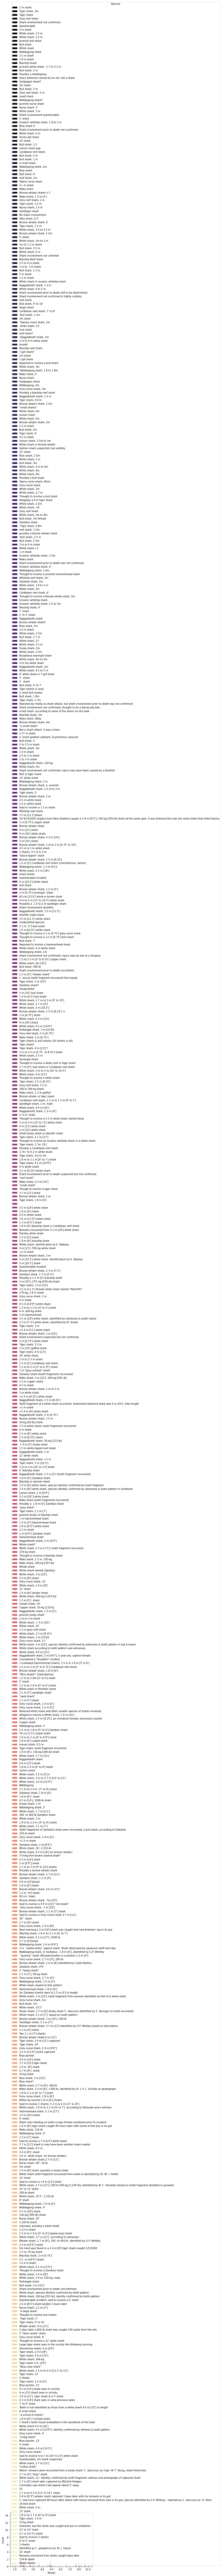

In [19]:
#sns.countplot(x=df_1["Month"], hue=df_1["Species "], palette="magma");

## TIME


In [20]:
 TIME


NameError: name 'TIME' is not defined

# DRAFT 


In [ ]:
list(df.columns)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.Country.unique()

In [ ]:
list(df.Time.unique()) # get the unique values

In [ ]:
list1= list(df.Country.unique())
list1

In [ ]:
country_name = 'MID ATLANTIC OCEAN'
country_obj = pycountry.countries.get(name=country_name)
if country_obj is not None:
    print(f"{country_name} EXISTS in pycountry")
else:
    print(f"{country_name} does not exist in pycountry")

In [ ]:
df['Country'] = df['Country'].apply(lambda x: x.title())

# Filtering

In [ ]:
df.Year == 

In [ ]:
country_to_continent = {
    'Australia': ('Oceania', 'South'),
    'Mexico': ('North America', 'North'),
    'Brazil': ('South America', 'South'),
    'South Africa': ('Africa', 'South'),
    'Thailand': ('Asia', 'North'),
    'Costa Rica': ('North America', 'North'),
    'Maldives': ('Asia', 'North'),
    'Bahamas': ('North America', 'North'),
    'New Caledonia': ('Oceania', 'South'),
    'Ecuador': ('South America', 'South'),
    'Malaysia': ('Asia', 'North'),
    'Cuba': ('North America', 'North'),
    'Mauritius': ('Africa', 'South'),
    'New Zealand': ('Oceania', 'South'),
    'Spain': ('Europe', 'North'),
    'Samoa': ('Oceania', 'South'),
    'Solomon Islands': ('Oceania', 'South'),
    'Japan': ('Asia', 'North'),
    'Egypt': ('Africa', 'North'),
    'Comoros': ('Africa', 'South'),
    'French Polynesia': ('Oceania', 'South'),
    'United Kingdom': ('Europe', 'North'),
    'United Arab Emirates': ('Asia', 'North'),
    'Philippines': ('Asia', 'North'),
    'Indonesia': ('Asia', 'North'),
    'China': ('Asia', 'North'),
    'Fiji': ('Oceania', 'South'),
    'Dominican Republic': ('North America', 'North'),
    'Cayman Islands': ('North America', 'North'),
    'Aruba': ('North America', 'North'),
    'Mozambique': ('Africa', 'South'),
    'Puerto Rico': ('North America', 'North'),
    'Italy': ('Europe', 'North'),
    'Greece': ('Europe', 'North'),
    'France': ('Europe', 'North'),
    'Papua New Guinea': ('Oceania', 'South'),
    'Kiribati': ('Oceania', 'South'),
    'Israel': ('Asia', 'North'),
    'Jamaica': ('North America', 'North'),
    'Guam': ('Oceania', 'North'),
    'Seychelles': ('Africa', 'South'),
    'Belize': ('North America', 'North'),
    'Nigeria': ('Africa', 'North'),
    'Tonga': ('Oceania', 'South'),
    'Canada': ('North America', 'North'),
    'Croatia': ('Europe', 'North'),
    'Saudi Arabia': ('Asia', 'North'),
    'Chile': ('South America', 'South'),
    'Kenya': ('Africa', 'South'),
    'Malta': ('Europe', 'North'),
    'Madagascar': ('Africa', 'South'),
    'Panama': ('North America', 'North'),
    'Somalia': ('Africa', 'North'),
    'Norway': ('Europe', 'North'),
    'Senegal': ('Africa', 'North'),
    'Yemen': ('Asia', 'North'),
    'Sierra Leone': ('Africa', 'North'),
    'Liberia': ('Africa', 'North'),
    'Vanuatu': ('Oceania', 'South'),
    'Honduras': ('North America', 'North'),
    'Sri Lanka': ('Asia', 'North'),
    'Uruguay': ('South America', 'South'),
    'India': ('Asia', 'North'),
    'Marshall Islands': ('Oceania', 'North'),
    'Hong Kong': ('Asia', 'North'),
    'El Salvador': ('North America', 'North'),
    'Angola': ('Africa', 'South'),
    'Bermuda': ('North America', 'North'),
    'Montenegro': ('Europe', 'North'),
    'Tunisia': ('Africa', 'North'),
    'Namibia': ('Africa', 'South'),
    'Portugal': ('Europe', 'North'),
    'Palau': ('Oceania', 'North'),
    'Grenada': ('North America', 'North'),
    'Turkey': ('Asia', 'North'),
    'Singapore': ('Asia', 'North'),
    'Sudan': ('Africa', 'North'),
    'American Samoa': ('Oceania', 'South'),
    'Argentina': ('South America', 'South'),
    'Guatemala': ('North America', 'North'),
    'Nicaragua': ('North America', 'North'),
    'Iraq': ('Asia', 'North'),
    'Iceland': ('Europe', 'North'),
    'Barbados': ('North America', 'North'),
    'Guyana': ('South America', 'South'),
    'Haiti': ('North America', 'North'),
    'Ireland': ('Europe', 'North'),
    'Lebanon': ('Asia', 'North'),
    'Paraguay': ('South America', 'South'),
    'Georgia': ('Asia', 'North'),
    'Guinea': ('Africa', 'North'),
    'Cook Islands': ('Oceania', 'South'),
    'Martinique': ('North America', 'North')
}